In [4]:
# Function to read conversion map from file
def read_conversion_map(filename):
    conversion_map = {}
    with open(filename, 'r') as file:
        for line in file:
            uniprot_id, gene_name = line.strip().split('\t')
            conversion_map[uniprot_id] = gene_name
    return conversion_map

# Usage
filename = 'C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/Directly-connected-proteins/first_150_gene_names.txt'
conversion_map = read_conversion_map(filename)


FileNotFoundError: [Errno 2] No such file or directory: 'represnetation-uniport-gene-name/first_150_gene_names.txt'

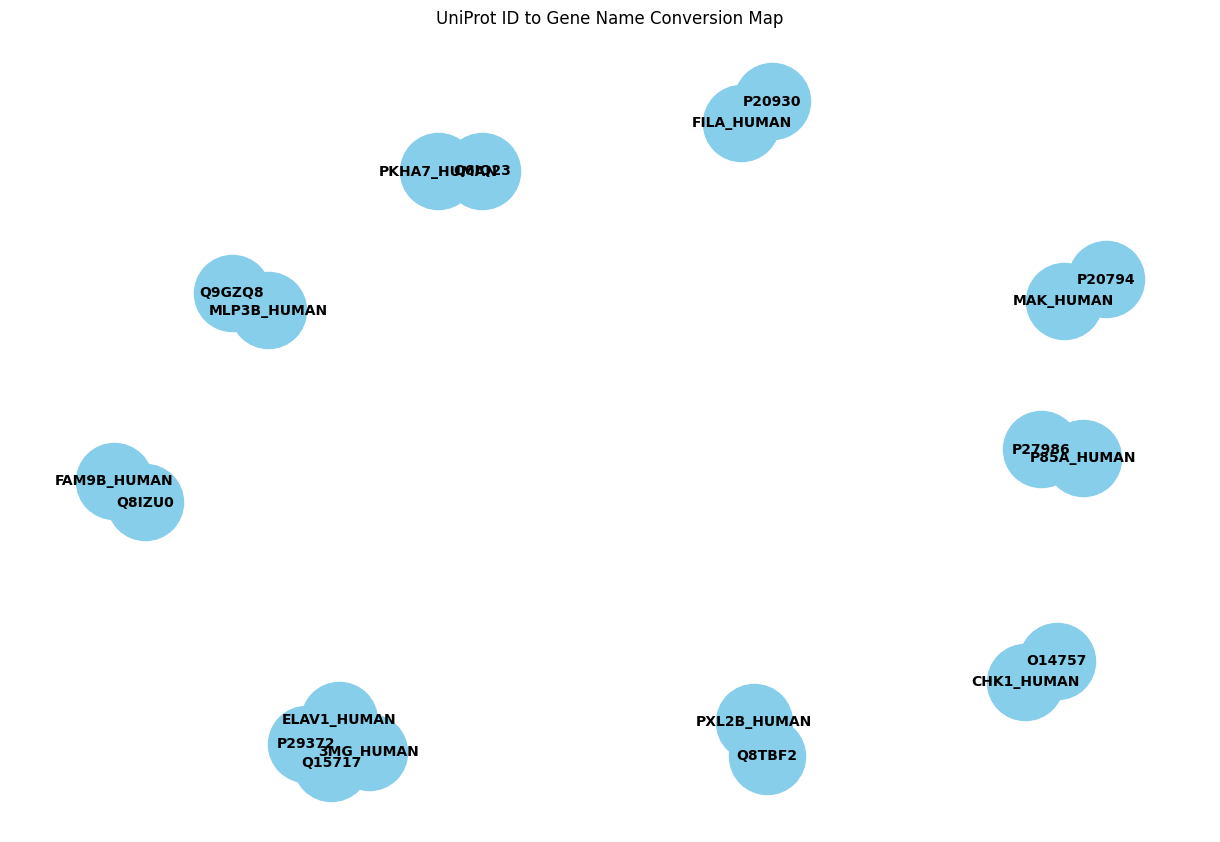

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
subset_map = dict(list(conversion_map.items())[:10])

# Add nodes and edges
for uniprot_id, gene_name in subset_map.items():
    G.add_node(uniprot_id, type='uniprot')
    G.add_node(gene_name, type='gene')
    G.add_edge(uniprot_id, gene_name)

# Position nodes using a layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("UniProt ID to Gene Name Conversion Map")
plt.show()


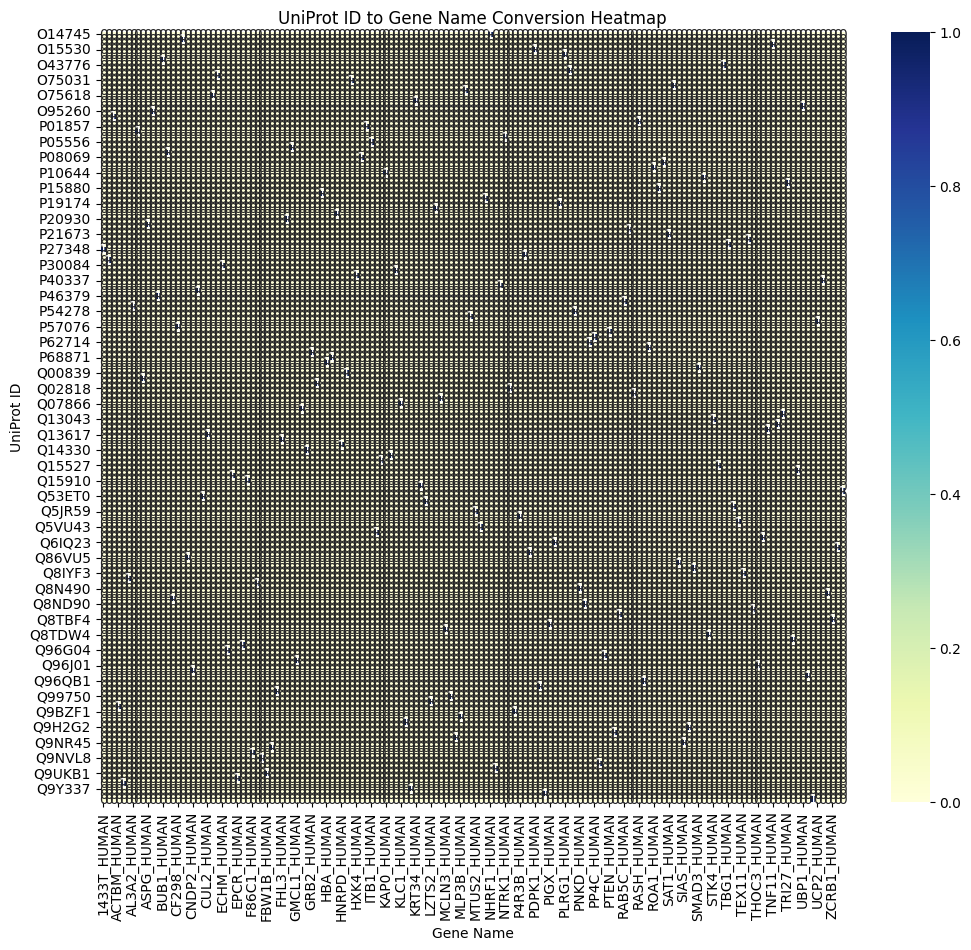

In [3]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from the conversion map
df = pd.DataFrame(list(conversion_map.items()), columns=['UniProt ID', 'Gene Name'])

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(df, index='UniProt ID', columns='Gene Name', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("UniProt ID to Gene Name Conversion Heatmap")
plt.show()
